<a href="https://colab.research.google.com/github/Gogonemnem/Safran-Project/blob/main/Visualization_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!git clone https://github.com/Gogonemnem/Safran-Project

Cloning into 'Safran-Project'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 298 (delta 73), reused 80 (delta 63), pack-reused 184
Receiving objects: 100% (298/298), 6.51 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [68]:
# Load the data

results = pd.read_csv("results.csv", sep=",")

In [74]:
# Divide the results in groups based on model types
results["Model"] = results["Model Name"].apply(lambda x: "SafeAeroBERT" if "SafeAeroBERT" in x else("LongFormer" if "longformer" in x else "BERT"))
results

,Model Name,Category,binary_accuracy,precision,recall,f1-score,support,Optimization Metric,Threshold,Model
0,NASA-AIML_MIKA_SafeAeroBERT_BCE,Deviation / Discrepancy - Procedural,0.731698,0.719699,0.889327,0.795572,6343.0,0.544085,0.41,SafeAeroBERT
1,NASA-AIML_MIKA_SafeAeroBERT_BCE,Aircraft Equipment,0.861268,0.830552,0.823489,0.827005,4351.0,0.544085,0.53,SafeAeroBERT
2,NASA-AIML_MIKA_SafeAeroBERT_BCE,Conflict,0.895974,0.661118,0.824375,0.733775,1879.0,0.544085,0.25,SafeAeroBERT
3,NASA-AIML_MIKA_SafeAeroBERT_BCE,Inflight Event / Encounter,0.813605,0.574991,0.647132,0.608932,2423.0,0.544085,0.29,SafeAeroBERT
4,NASA-AIML_MIKA_SafeAeroBERT_BCE,ATC Issue,0.864970,0.686426,0.775971,0.728457,2522.0,0.544085,0.30,SafeAeroBERT
...,...,...,...,...,...,...,...,...,...,...
535,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",No Specific Anomaly Occurred,0.991763,0.000000,0.000000,0.000000,89.0,0.691735,0.90,SafeAeroBERT
536,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",micro avg,0.935982,0.769529,0.823095,0.795411,22871.0,0.691735,NaN,SafeAeroBERT
537,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",macro avg,0.935982,0.674128,0.713360,0.691735,22871.0,0.691735,NaN,SafeAeroBERT
538,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",weighted avg,0.935982,0.768397,0.823095,0.793963,22871.0,0.691735,NaN,SafeAeroBERT


In [70]:
import re 

# Change model configuration names
def shorten_model_name(name):
    # Define regular expression patterns and their corresponding replacements
    patterns = [
        (r'NASA-AIML_MIKA_SafeAeroBERT', 'NasaAeroBERT'),
        (r'allenai_longformer-base-4096', 'Longformer'),
        (r'bert-base-uncased', 'BertBase'),
        (r'Unfrozen\[(.*?)\]', 'Unfrz'),
        (r'BCE-Balanced', 'BCEBal'),
        (r'BinaryFocal-Balanced', 'BinFocalBal'),
        (r'BCE', 'BCE'),
        (r'BinaryFocal', 'BinFocal'),
        (r'Abbreviated', 'Abbrv')
    ]

    # Apply regular expression replacements
    for pattern, replacement in patterns:
        name = re.sub(pattern, replacement, name)

    return name

# Obtain unique model configurations
unique_categories =  results['Model Name'].unique()
shortened_model_names = [shorten_model_name(name) for name in unique_categories]

# Use model configurations for axis labels
xticks = shortened_model_names

/tmp/ipykernel_150523/1755455074.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)


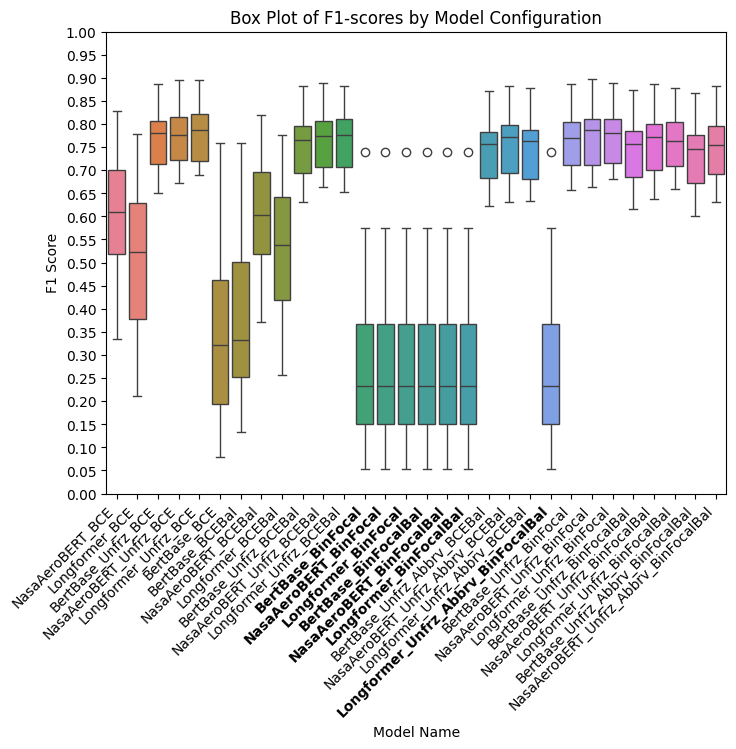

In [73]:
######################################################
# Plot of the F1-score for all model configurations
######################################################

# Filter out this outlier class 'No specific anomoly occurred' 
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)
plt.title('Box Plot of F1-scores by Model Configuration')
plt.ylabel('F1 Score')

y_ticks = np.arange(0, 1.05, 0.05)

# Formatting xticks to make the ticks with deviating results bold
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
for i, tick in enumerate(plt.gca().get_xticklabels()):
    if xticks[i] in ['BertBase_BinFocal', 'NasaAeroBERT_BinFocal', 'Longformer_BinFocal', 'BertBase_BinFocalBal', 'NasaAeroBERT_BinFocalBal', 'Longformer_BinFocalBal', 'Longformer_Unfrz_Abbrv_BinFocalBal' ]:
        tick.set_fontweight('bold')

plt.yticks(y_ticks)
plt.show()


Text(0, 0.5, 'F1-Score')

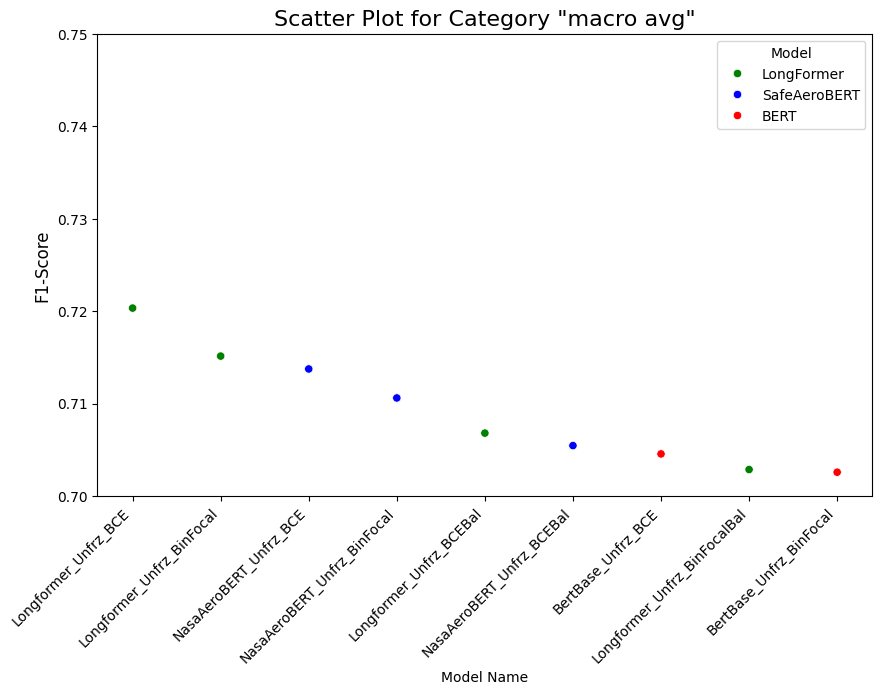

In [104]:
import numpy as np

############################################################
# Plot of the F1-score for the 10 best model configurations
############################################################

# Select best performing models
top_models = 10 
results_macro_avg = results[results["Category"] == 'macro avg']
results_macro_avg = results_macro_avg.sort_values("f1-score", ascending = False)[0:(top_models-1)]

# Create new x-axis labels
unique_categories = results_macro_avg["Model Name"].unique().tolist()
xticks_filtered = [shorten_model_name(name) for name in unique_categories]

custom_palette = {"BERT": 'red', "LongFormer": 'green', "SafeAeroBERT": 'blue'}
plt.figure(figsize=(10,6))
sns.scatterplot(x='Model Name', y = 'f1-score', data = results_macro_avg, hue="Model",palette = custom_palette)
plt.title('Scatter Plot for Category "macro avg"', fontsize=16)

y_ticks = np.arange(0.7, 0.75, 0.01)
plt.xticks(range(len(xticks_filtered)), xticks_filtered, rotation=45, ha='right')
plt.yticks(y_ticks)
plt.ylabel('F1-Score', fontsize=12)

/tmp/ipykernel_150523/946109520.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)


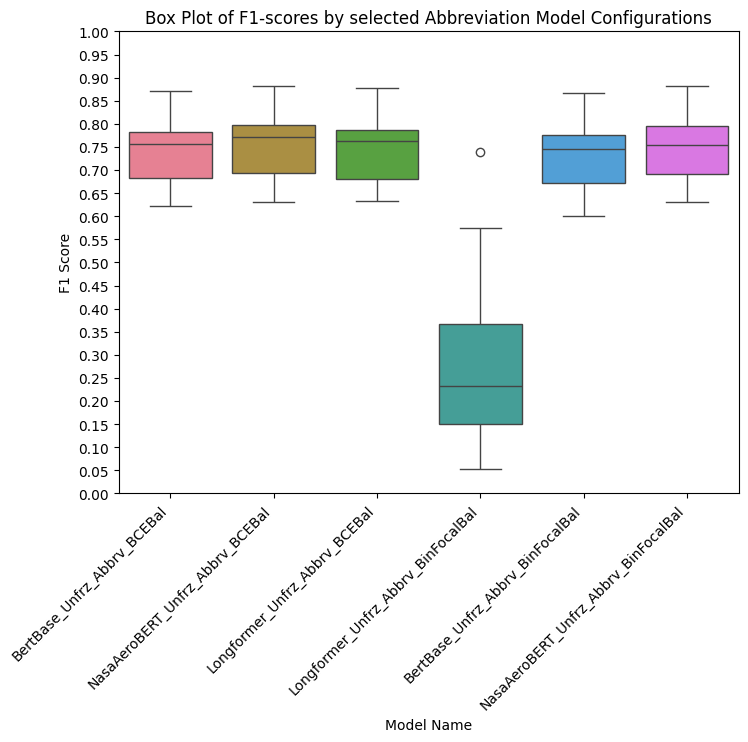

In [124]:
###############################################
# Plot of the abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
substring_abb = 'Abbreviated'  
df_abb = results_filtered[results_filtered['Model Name'].str.contains(substring_abb)]

df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()



/tmp/ipykernel_150523/602877426.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)


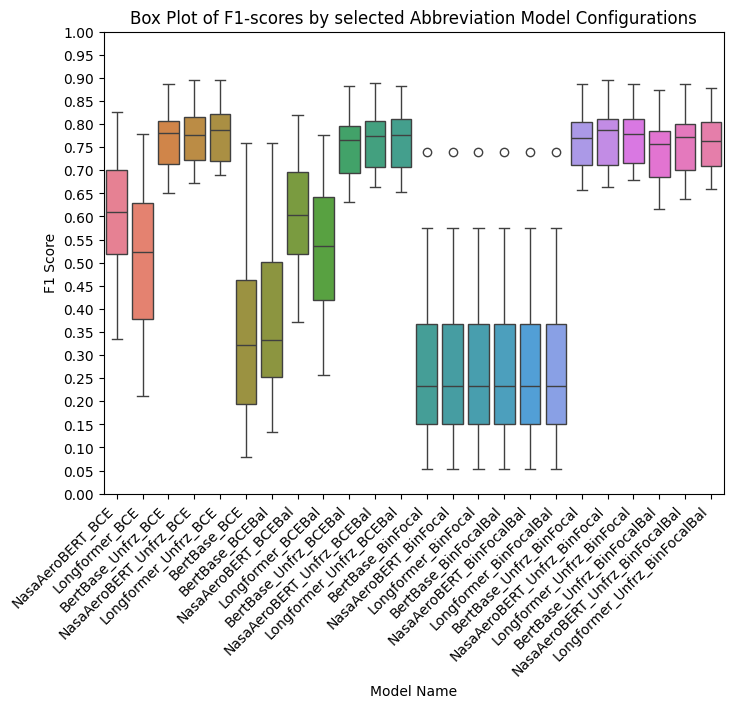

In [128]:
###############################################
# Plot of the non abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_without_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()

In [ ]:
exclude_categories = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
filtered_df = results[~results['Category'].isin(exclude_categories)]